In [6]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, LabelEncoder

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split


# 일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다.

# 또한, cross_val_score 함수에는 KFold의 매개변수를 제어할 수가 없으므로, 

# 따로 KFold 객체를 만들고 매개변수를 조정한 다음에 cross_val_score의 cv 매개변수에 넣어야 한다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, make_scorer, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

import warnings         # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [7]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [8]:
train = pd.read_csv('./train_dummies.csv')

In [5]:
train.head()

,age,balance,day,month,campaign,pdays,previous,y,default_yes,housing_yes,loan_yes,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_other,poutcome_success,poutcome_unknown,marital_married,marital_single
0,57,2299,12,11,3,-1,0,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,31,246,16,5,2,-1,0,False,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,58,1230,20,5,1,87,1,True,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,32,569,29,1,1,-1,0,False,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
4,54,0,15,7,4,-1,0,False,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [9]:
test = pd.read_csv('./test_dummies.csv')

In [26]:
test.head()

,age,balance,day,month,campaign,pdays,previous,default_yes,housing_yes,loan_yes,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_other,poutcome_success,poutcome_unknown,marital_married,marital_single
0,61,848,27,4,1,187,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,44,0,20,8,5,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
2,54,602,3,3,2,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,28,799,25,7,1,-1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
4,52,425,28,1,2,254,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# df_train 으로 데이터불러오기 (샘플링기법 적용x)

In [10]:
y = train['y']
y.shape

(22605,)

In [11]:
X = train.drop(['y'], axis=1)
X.shape

(22605, 31)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [48]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(18084, 31), 테스트 세트 Shape:(4521, 31)
 학습 세트 레이블 값 분포 비율
False    0.882438
True     0.117562
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.875912
True     0.124088
Name: y, dtype: float64


# 언더 샘플링¶

- RandomUnderSampler : random under-sampling method
- TomekLinks : Tomek’s link method
- CondensedNearestNeighbour : condensed nearest neighbour method
- OneSidedSelection : under-sampling based on one-sided selection method
- EditedNearestNeighbours : edited nearest neighbour method
- NeighbourhoodCleaningRule : neighbourhood cleaning rule

In [14]:
import sklearn.metrics as metrics

In [15]:
from imblearn.under_sampling import *

# CNN

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [12]:
X_train, y_train = CondensedNearestNeighbour(n_jobs=-1).fit_sample(X_train, y_train)

In [13]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(6288, 31), 테스트 세트 Shape:(4521, 31)
 학습 세트 레이블 값 분포 비율
False    0.658079
True     0.341921
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881221
True     0.118779
Name: y, dtype: float64


In [14]:
import sklearn.metrics as metrics

In [15]:
# Light GBM

lgbm_clf = LGBMClassifier(n_estimators=400, n_jobs = -1)
lgbm_clf.fit(X_train, y_train)
lgbm_clf_pred = lgbm_clf.predict(X_test)

lgbm_clf_cv_pre = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
lgbm_clf_cv_rec = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
lgbm_clf_cv_f1 = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Light GBM is ', metrics.precision_score(lgbm_clf_pred, y_test))
print('Recall for Light GBM is ', metrics.recall_score(lgbm_clf_pred, y_test))
print('F1_score for Light GBM is ', metrics.f1_score(lgbm_clf_pred, y_test))
print()
print('The cross validated precision for Light GBM is:', lgbm_clf_cv_pre.mean())
print('The cross validated recall for Light GBM is:', lgbm_clf_cv_rec.mean())
print('The cross validated f1_score for Light GBM is:', lgbm_clf_cv_f1.mean())

Precision for Light GBM is  0.45623836126629425
Recall for Light GBM is  0.3763440860215054
F1_score for Light GBM is  0.4124579124579124

The cross validated precision for Light GBM is: 0.6426657675397066
The cross validated recall for Light GBM is: 0.48651162790697666
The cross validated f1_score for Light GBM is: 0.552776372234556


In [16]:
##

pred_proba = lgbm_clf.predict_proba(X_test)
pred  = lgbm_clf.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.49396842 0.50603158]
 [0.37382481 0.62617519]
 [0.90386439 0.09613561]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.49396842 0.50603158 0.49396842 0.50603158]
 [0.37382481 0.62617519 0.37382481 0.62617519]
 [0.90386439 0.09613561 0.90386439 0.09613561]]


In [22]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1_score = metrics.f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1_score: {2: 4f}'.format(accuracy , precision ,recall, f1_score))

In [18]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3578  406]
 [ 292  245]]
정확도: 0.8456, 정밀도: 0.3763, 재현율: 0.4562, F1_score:  0.456238


In [23]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[3578  406]
 [ 270  267]]
정확도: 0.8505, 정밀도: 0.3967, 재현율: 0.4972, F1_score:  0.497207
임곗값: 0.45
오차 행렬
[[3637  347]
 [ 284  253]]
정확도: 0.8604, 정밀도: 0.4217, 재현율: 0.4711, F1_score:  0.471136
임곗값: 0.5
오차 행렬
[[3668  316]
 [ 307  230]]
정확도: 0.8622, 정밀도: 0.4212, 재현율: 0.4283, F1_score:  0.428305
임곗값: 0.55
오차 행렬
[[3700  284]
 [ 313  224]]
정확도: 0.8679, 정밀도: 0.4409, 재현율: 0.4171, F1_score:  0.417132
임곗값: 0.6
오차 행렬
[[3728  256]
 [ 326  211]]
정확도: 0.8713, 정밀도: 0.4518, 재현율: 0.3929, F1_score:  0.392924


In [20]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf.predict_proba(X_test)[:, 1] 

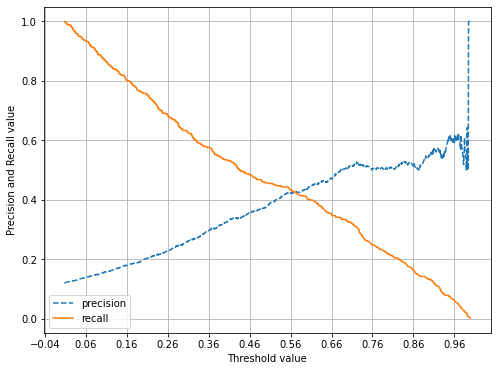

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf.predict_proba(X_test)[:, 1] )


In [22]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf, X_test, y_test)

(0.555, 0.4325)

In [23]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.555
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3662  322]
 [ 300  237]]
정확도: 0.8624, 정밀도: 0.4240, 재현율: 0.4413, F1_score:  0.441341


In [27]:

pred_proba_1 = lgbm_clf.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.555).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_cnn_0.555_nongrid.csv', index = False)

## GridsearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소

params = {'num_leaves': [8 ,16 ,32, 64],
          'max_depth':[16, 32, 64, 128, 160],
          'min_child_samples':[20, 60, 100],
          'subsample':[0.2, 0.4, 0.6, 0.8, 1],
         'n_estimators':[100,300,500,700,900,1200]}



gridcv = GridSearchCV(lgbm_clf, param_grid=params, verbose=3, n_jobs=-1, cv=3)

In [30]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed:  7.2min finished


[1]	training's binary_logloss: 0.624581	valid_1's binary_logloss: 0.482861
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.610036	valid_1's binary_logloss: 0.471395
[3]	training's binary_logloss: 0.598536	valid_1's binary_logloss: 0.462054
[4]	training's binary_logloss: 0.588842	valid_1's binary_logloss: 0.453917
[5]	training's binary_logloss: 0.5809	valid_1's binary_logloss: 0.44724
[6]	training's binary_logloss: 0.574	valid_1's binary_logloss: 0.441555
[7]	training's binary_logloss: 0.568443	valid_1's binary_logloss: 0.436838
[8]	training's binary_logloss: 0.563225	valid_1's binary_logloss: 0.432433
[9]	training's binary_logloss: 0.558763	valid_1's binary_logloss: 0.42858
[10]	training's binary_logloss: 0.554877	valid_1's binary_logloss: 0.425249
[11]	training's binary_logloss: 0.551773	valid_1's binary_logloss: 0.422459
[12]	training's binary_logloss: 0.548528	valid_1's binary_logloss: 0.419525
[13]	training's binary_logloss: 0.545608	va

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [16, 32, 64, 128, 160],
                         'min_child_samples': [20, 60, 100],
                         'n_estimators': [100, 300, 500, 700, 900, 1200],
                         'num_leaves': [8, 16, 32, 64],
                         'subsample': [0.2, 0.4, 0.6, 0.8, 1]},
             verbose=3)

In [31]:
gridcv.best_estimator_

LGBMClassifier(max_depth=16, min_child_samples=60, n_estimators=300,
               num_leaves=16, subsample=0.2)

In [32]:
lgbm_clf_best = LGBMClassifier(max_depth=16, min_child_samples=60, n_estimators=300,
               num_leaves=16, subsample=0.2)

In [33]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=16, min_child_samples=60, n_estimators=300,
               num_leaves=16, subsample=0.2)

In [34]:
##

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.72048272 0.27951728]
 [0.23623829 0.76376171]
 [0.74302844 0.25697156]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.72048272 0.27951728 0.72048272 0.27951728]
 [0.23623829 0.76376171 0.23623829 0.76376171]
 [0.74302844 0.25697156 0.74302844 0.25697156]]


In [35]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3654  330]
 [ 280  257]]
정확도: 0.8651, 정밀도: 0.4378, 재현율: 0.4786, F1_score:  0.478585


In [36]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1] 


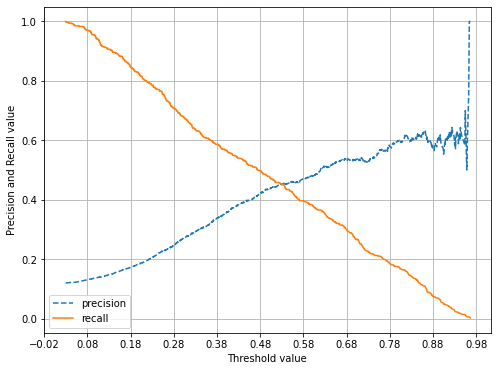

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [38]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.495, 0.4576)

In [39]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.495
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3648  336]
 [ 278  259]]
정확도: 0.8642, 정밀도: 0.4353, 재현율: 0.4823, F1_score:  0.482309


In [40]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.495).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_cnn_0.495_grid.csv', index = False)

# RandomizedGridsearch

In [41]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [1,2,3,4,5,6,7,8,9,10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}


In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

lg_cl = LGBMClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


LGBMClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
               min_samples_leaf=6, min_samples_split=9)


In [43]:
lgb_random_best = LGBMClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
               min_samples_leaf=6, min_samples_split=9)

In [44]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
               min_samples_leaf=6, min_samples_split=9)

In [45]:
## 1 ##

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.6299729  0.3700271 ]
 [0.34303257 0.65696743]
 [0.85921016 0.14078984]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.6299729  0.3700271  0.6299729  0.3700271 ]
 [0.34303257 0.65696743 0.34303257 0.65696743]
 [0.85921016 0.14078984 0.85921016 0.14078984]]


In [46]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3669  315]
 [ 287  250]]
정확도: 0.8668, 정밀도: 0.4425, 재현율: 0.4655, F1_score:  0.465549


In [47]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1] ###

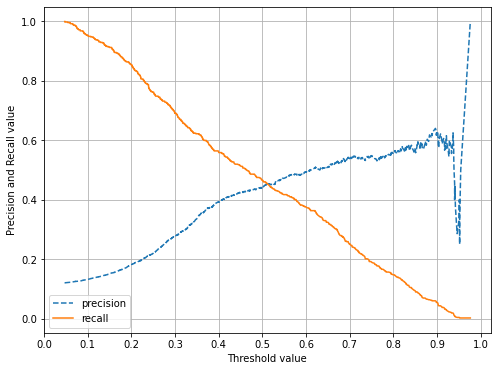

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [49]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.41, 0.4664)

In [ ]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.41
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

In [50]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgb_random_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.41).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_cnn_0.41_randomgrid.csv', index = False)

## BaysianOptimization

In [54]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [55]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [56]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [57]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.773459	valid_0's binary_logloss: 0.407508
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.773493	valid_0's binary_logloss: 0.407862
best_iter: 98
roc_auc: 0.7734934150007852
|  1        |  0.7735   |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, '

In [58]:
BO_lgb.max

{'target': 0.7910828603052807,
 'params': {'colsample_bytree': 0.5,
  'max_depth': 11.12679483678059,
  'min_child_weight': 5.0,
  'min_split_gain': 0.1,
  'num_leaves': 32.522642185216355,
  'reg_alpha': 0.0,
  'reg_lambda': 0.0,
  'subsample': 1.0}}

In [59]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.693246	valid_0's binary_logloss: 0.49416
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.704157	valid_0's binary_logloss: 0.492731
[3]	valid_0's auc: 0.713638	valid_0's binary_logloss: 0.49078
[4]	valid_0's auc: 0.725675	valid_0's binary_logloss: 0.488828
[5]	valid_0's auc: 0.732925	valid_0's binary_logloss: 0.486777
[6]	valid_0's auc: 0.736101	valid_0's binary_logloss: 0.484953
[7]	valid_0's auc: 0.737922	valid_0's binary_logloss: 0.483194
[8]	valid_0's auc: 0.755949	valid_0's binary_logloss: 0.480851
[9]	valid_0's auc: 0.762304	valid_0's binary_logloss: 0.478356
[10]	valid_0's auc: 0.764042	valid_0's binary_logloss: 0.476744
[11]	valid_0's auc: 0.768317	valid_0's binary_logloss: 0.474271
[12]	valid_0's auc: 0.767927	valid_0's binary_logloss: 0.473187
[13]	valid_0's auc: 0.769539	valid_0's binary_logloss: 0.471151
[14]	valid_0's auc: 0.774981	valid_0's binary_logloss: 0.468984
[15]	valid_0's auc: 0.774106	valid_0's binary_logloss

In [60]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.02, max_depth=11,
               min_child_weight=5.0, min_split_gain=0.1, n_estimators=1000,
               num_leaves=33)

In [61]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.02, max_depth=11,
               min_child_weight=5.0, min_split_gain=0.1, n_estimators=1000,
               num_leaves=33)

In [62]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.75571917 0.24428083]
 [0.26302062 0.73697938]
 [0.77088092 0.22911908]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.75571917 0.24428083 0.72048272 0.27951728]
 [0.26302062 0.73697938 0.23623829 0.76376171]
 [0.77088092 0.22911908 0.74302844 0.25697156]]


In [63]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3687  297]
 [ 281  256]]
정확도: 0.8722, 정밀도: 0.4629, 재현율: 0.4767, F1_score:  0.476723


In [64]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###



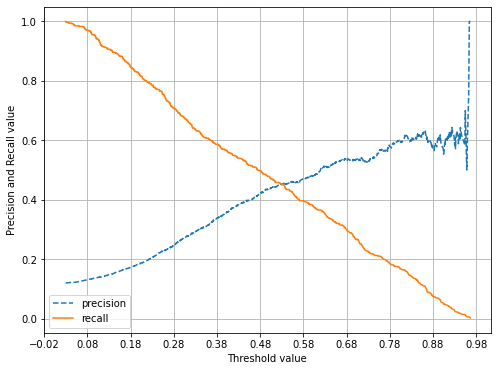

In [65]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [66]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.48, 0.4755)

In [67]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.48
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3665  319]
 [ 270  267]]
정확도: 0.8697, 정밀도: 0.4556, 재현율: 0.4972, F1_score:  0.497207


In [68]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_bayes_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.48).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_cnn_0.48_bayesgrid.csv', index = False)

### One Sided Selection

- One Sided Selection은 토맥링크 방법과 Condensed Nearest Neighbour 방법을 섞은 것이다. 
- 토맥링크 중 다수 클래스를 제외하고 나머지 데이터 중에서도 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외한다.

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [70]:
X_train, y_train = OneSidedSelection(random_state=0,n_jobs=-1).fit_sample(X_train, y_train)

In [71]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(17240, 31), 테스트 세트 Shape:(4521, 31)
 학습 세트 레이블 값 분포 비율
False    0.87529
True     0.12471
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881221
True     0.118779
Name: y, dtype: float64


In [72]:
# Light GBM

lgbm_clf = LGBMClassifier(n_estimators=400, n_jobs = -1)
lgbm_clf.fit(X_train, y_train)
lgbm_clf_pred = lgbm_clf.predict(X_test)

lgbm_clf_cv_pre = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
lgbm_clf_cv_rec = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
lgbm_clf_cv_f1 = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Light GBM is ', metrics.precision_score(lgbm_clf_pred, y_test))
print('Recall for Light GBM is ', metrics.recall_score(lgbm_clf_pred, y_test))
print('F1_score for Light GBM is ', metrics.f1_score(lgbm_clf_pred, y_test))
print()
print('The cross validated precision for Light GBM is:', lgbm_clf_cv_pre.mean())
print('The cross validated recall for Light GBM is:', lgbm_clf_cv_rec.mean())
print('The cross validated f1_score for Light GBM is:', lgbm_clf_cv_f1.mean())

Precision for Light GBM is  0.30353817504655495
Recall for Light GBM is  0.573943661971831
F1_score for Light GBM is  0.3970767356881852

The cross validated precision for Light GBM is: 0.5752993964394424
The cross validated recall for Light GBM is: 0.2623255813953488
The cross validated f1_score for Light GBM is: 0.3596116365390817


In [ ]:
##

pred_proba = lgbm_clf.predict_proba(X_test)
pred  = lgbm_clf.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


In [73]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3497  487]
 [ 471   66]]
정확도: 0.7881, 정밀도: 0.1193, 재현율: 0.1229, F1_score:  0.122905


In [74]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf.predict_proba(X_test)[:, 1] 

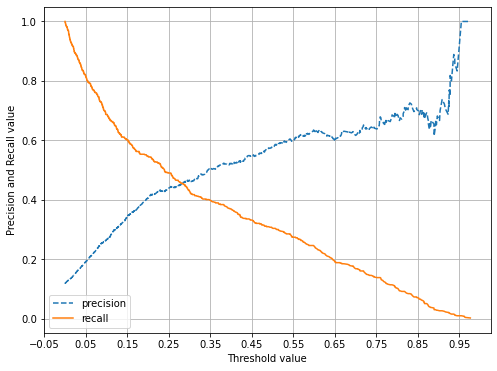

In [75]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf.predict_proba(X_test)[:, 1] )


In [76]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf, X_test, y_test)

(0.225, 0.4715)

In [77]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.225
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[2064 1920]
 [ 280  257]]
정확도: 0.5134, 정밀도: 0.1181, 재현율: 0.4786, F1_score:  0.478585


In [78]:

pred_proba_1 = lgbm_clf.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.225).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_OSS_0.225_nongrid.csv', index = False)

# GridsearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소

params = {'num_leaves': [8 ,16 ,32, 64],
          'max_depth':[16, 32, 64, 128, 160],
          'min_child_samples':[20, 60, 100],
          'subsample':[0.2, 0.4, 0.6, 0.8, 1],
         'n_estimators':[100,300,500,700,900,1200]}



gridcv = GridSearchCV(lgbm_clf, param_grid=params, verbose=3, n_jobs=-1, cv=3)

In [80]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 11.2min finished


[1]	training's binary_logloss: 0.362792	valid_1's binary_logloss: 0.350754
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.352749	valid_1's binary_logloss: 0.34009
[3]	training's binary_logloss: 0.345598	valid_1's binary_logloss: 0.332801
[4]	training's binary_logloss: 0.340506	valid_1's binary_logloss: 0.328064
[5]	training's binary_logloss: 0.335961	valid_1's binary_logloss: 0.3235
[6]	training's binary_logloss: 0.33227	valid_1's binary_logloss: 0.319541
[7]	training's binary_logloss: 0.329335	valid_1's binary_logloss: 0.316519
[8]	training's binary_logloss: 0.326898	valid_1's binary_logloss: 0.314027
[9]	training's binary_logloss: 0.32471	valid_1's binary_logloss: 0.312143
[10]	training's binary_logloss: 0.322872	valid_1's binary_logloss: 0.310454
[11]	training's binary_logloss: 0.321371	valid_1's binary_logloss: 0.309068
[12]	training's binary_logloss: 0.32009	valid_1's binary_logloss: 0.307671
[13]	training's binary_logloss: 0.31874	va

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [16, 32, 64, 128, 160],
                         'min_child_samples': [20, 60, 100],
                         'n_estimators': [100, 300, 500, 700, 900, 1200],
                         'num_leaves': [8, 16, 32, 64],
                         'subsample': [0.2, 0.4, 0.6, 0.8, 1]},
             verbose=3)

In [81]:
gridcv.best_estimator_

LGBMClassifier(max_depth=16, num_leaves=8, subsample=0.2)

In [82]:
lgbm_clf_best = LGBMClassifier(max_depth=16, num_leaves=8, subsample=0.2)

In [83]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=16, num_leaves=8, subsample=0.2)

In [84]:
##

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.95778395 0.04221605]
 [0.95439164 0.04560836]
 [0.94361479 0.05638521]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.95778395 0.04221605 0.95778395 0.04221605]
 [0.95439164 0.04560836 0.95439164 0.04560836]
 [0.94361479 0.05638521 0.94361479 0.05638521]]


In [85]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3909   75]
 [ 413  124]]
정확도: 0.8921, 정밀도: 0.6231, 재현율: 0.2309, F1_score:  0.230912


In [86]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1] 

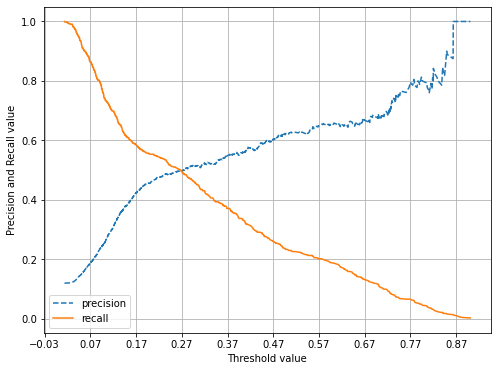

In [87]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [91]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.2163, 0.5095)

In [92]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.2163
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3661  323]
 [ 243  294]]
정확도: 0.8748, 정밀도: 0.4765, 재현율: 0.5475, F1_score:  0.547486


In [93]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.2163).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_OSS_0.2163_grid.csv', index = False)

## RandomizedGridsearchCV

In [94]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [1,2,3,4,5,6,7,8,9,10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

min_samples_split = [1,2,3,4,5,6,7,8,9,10]

min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [95]:
lg_cl = LGBMClassifier()

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.7min finished


LGBMClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
               min_samples_leaf=5, min_samples_split=7)


In [96]:
lgb_random_best = LGBMClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
               min_samples_leaf=5, min_samples_split=7)

In [97]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
               min_samples_leaf=5, min_samples_split=7)

In [98]:
## 1 ##

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.96855366 0.03144634]
 [0.95146942 0.04853058]
 [0.96443795 0.03556205]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.96855366 0.03144634 0.96855366 0.03144634]
 [0.95146942 0.04853058 0.95146942 0.04853058]
 [0.96443795 0.03556205 0.96443795 0.03556205]]


In [99]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3879  105]
 [ 381  156]]
정확도: 0.8925, 정밀도: 0.5977, 재현율: 0.2905, F1_score:  0.290503


In [100]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1] ###

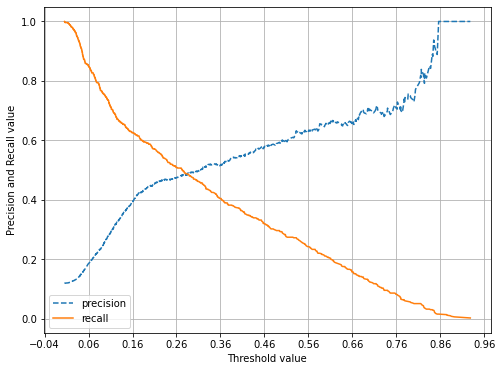

In [101]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [102]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.2, 0.5077)

In [104]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.2
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3595  389]
 [ 222  315]]
정확도: 0.8649, 정밀도: 0.4474, 재현율: 0.5866, F1_score:  0.586592


In [105]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgb_random_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.2).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_OSS_0.2_randomgrid.csv', index = False)

## BaysianOptimization

In [106]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [107]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [108]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [109]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.796566	valid_0's binary_logloss: 0.294599
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.796566	valid_0's binary_logloss: 0.294599
best_iter: 100
roc_auc: 0.796565919170163
|  1        |  0.7966   |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, 

In [110]:
BO_lgb.max

{'target': 0.8064394449305602,
 'params': {'colsample_bytree': 0.7280751661082743,
  'max_depth': 8.547471590949188,
  'min_child_weight': 5.845541019635982,
  'min_split_gain': 0.062145914210511834,
  'num_leaves': 36.85401017717085,
  'reg_alpha': 0.30846699843737846,
  'reg_lambda': 0.4718740392573121,
  'subsample': 0.8409101495517417}}

In [111]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.755642	valid_0's binary_logloss: 0.361176
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.796754	valid_0's binary_logloss: 0.357849
[3]	valid_0's auc: 0.800805	valid_0's binary_logloss: 0.354942
[4]	valid_0's auc: 0.797208	valid_0's binary_logloss: 0.352393
[5]	valid_0's auc: 0.797053	valid_0's binary_logloss: 0.350064
[6]	valid_0's auc: 0.797028	valid_0's binary_logloss: 0.347862
[7]	valid_0's auc: 0.797559	valid_0's binary_logloss: 0.345815
[8]	valid_0's auc: 0.799448	valid_0's binary_logloss: 0.343342
[9]	valid_0's auc: 0.800101	valid_0's binary_logloss: 0.341015
[10]	valid_0's auc: 0.800144	valid_0's binary_logloss: 0.339326
[11]	valid_0's auc: 0.801525	valid_0's binary_logloss: 0.33715
[12]	valid_0's auc: 0.80088	valid_0's binary_logloss: 0.335912
[13]	valid_0's auc: 0.800711	valid_0's binary_logloss: 0.334008
[14]	valid_0's auc: 0.800504	valid_0's binary_logloss: 0.332529
[15]	valid_0's auc: 0.799439	valid_0's binary_logloss

In [112]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.7280751661082743, learning_rate=0.02,
               max_depth=9, min_child_weight=5.845541019635982,
               min_split_gain=0.062145914210511834, n_estimators=1000,
               num_leaves=37, reg_alpha=0.30846699843737846,
               reg_lambda=0.4718740392573121, subsample=0.8409101495517417)

In [113]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7280751661082743, learning_rate=0.02,
               max_depth=9, min_child_weight=5.845541019635982,
               min_split_gain=0.062145914210511834, n_estimators=1000,
               num_leaves=37, reg_alpha=0.30846699843737846,
               reg_lambda=0.4718740392573121, subsample=0.8409101495517417)

In [114]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.98031785 0.01968215]
 [0.94411939 0.05588061]
 [0.97845843 0.02154157]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.98031785 0.01968215 0.95778395 0.04221605]
 [0.94411939 0.05588061 0.95439164 0.04560836]
 [0.97845843 0.02154157 0.94361479 0.05638521]]


In [115]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3869  115]
 [ 380  157]]
정확도: 0.8905, 정밀도: 0.5772, 재현율: 0.2924, F1_score:  0.292365


In [116]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###

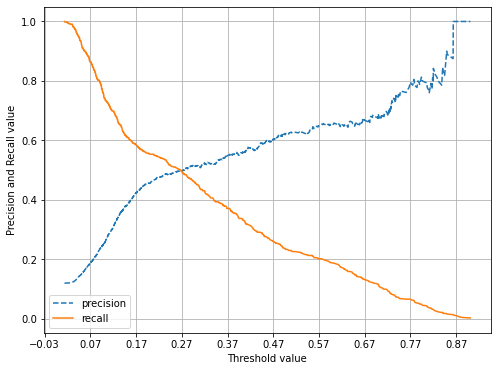

In [117]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [118]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.295, 0.5042)

In [119]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.295
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3720  264]
 [ 267  270]]
정확도: 0.8825, 정밀도: 0.5056, 재현율: 0.5028, F1_score:  0.502793


In [120]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_bayes_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.295).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_OSS_0.295_bayesgrid.csv', index = False)

### Edited Nearest Neighbours

- ENN(Edited Nearest Neighbours) 방법은 다수 클래스 데이터 중 가장 가까운 k(n_neighbors)개의 데이터가 모두(kind_sel="all") 또는 다수(kind_sel="mode") 다수 클래스가 아니면 삭제하는 방법이다. 소수 클래스 주변의 다수 클래스 데이터는 사라진다.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [17]:
X_train, y_train = EditedNearestNeighbours(n_jobs=-1,n_neighbors=5).fit_sample(X_train, y_train)

In [18]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(11993, 31), 테스트 세트 Shape:(4521, 31)
 학습 세트 레이블 값 분포 비율
False    0.820729
True     0.179271
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881221
True     0.118779
Name: y, dtype: float64


In [19]:
# Light GBM

lgbm_clf = LGBMClassifier(n_estimators=400, n_jobs = -1)
lgbm_clf.fit(X_train, y_train)
lgbm_clf_pred = lgbm_clf.predict(X_test)

lgbm_clf_cv_pre = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
lgbm_clf_cv_rec = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
lgbm_clf_cv_f1 = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Light GBM is ', metrics.precision_score(lgbm_clf_pred, y_test))
print('Recall for Light GBM is ', metrics.recall_score(lgbm_clf_pred, y_test))
print('F1_score for Light GBM is ', metrics.f1_score(lgbm_clf_pred, y_test))
print()
print('The cross validated precision for Light GBM is:', lgbm_clf_cv_pre.mean())
print('The cross validated recall for Light GBM is:', lgbm_clf_cv_rec.mean())
print('The cross validated f1_score for Light GBM is:', lgbm_clf_cv_f1.mean())

Precision for Light GBM is  0.42830540037243947
Recall for Light GBM is  0.42124542124542125
F1_score for Light GBM is  0.42474607571560485

The cross validated precision for Light GBM is: 0.7321599723709288
The cross validated recall for Light GBM is: 0.44372093023255815
The cross validated f1_score for Light GBM is: 0.5518622618215966


In [20]:
##

pred_proba = lgbm_clf.predict_proba(X_test)
pred  = lgbm_clf.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.85696327 0.14303673]
 [0.98857628 0.01142372]
 [0.96495706 0.03504294]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.85696327 0.14303673 0.85696327 0.14303673]
 [0.98857628 0.01142372 0.98857628 0.01142372]
 [0.96495706 0.03504294 0.96495706 0.03504294]]


In [24]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3668  316]
 [ 307  230]]
정확도: 0.8622, 정밀도: 0.4212, 재현율: 0.4283, F1_score:  0.428305


In [25]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf.predict_proba(X_test)[:, 1] 

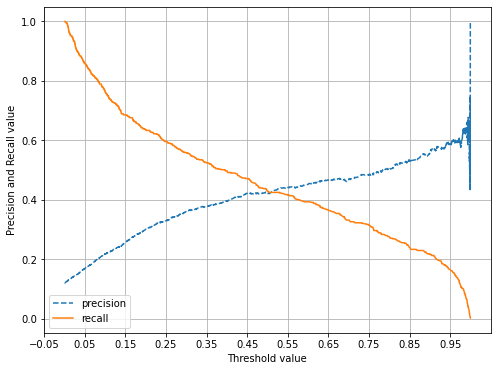

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf.predict_proba(X_test)[:, 1] )


In [27]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf, X_test, y_test)

(0.42, 0.4458)

In [28]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.42
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3604  380]
 [ 274  263]]
정확도: 0.8553, 정밀도: 0.4090, 재현율: 0.4898, F1_score:  0.489758


In [29]:

pred_proba_1 = lgbm_clf.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.42).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_ENN_0.42_nongrid.csv', index = False)

## GridsearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소

params = {'num_leaves': [8 ,16 ,32, 64],
          'max_depth':[16, 32, 64, 128, 160],
          'min_child_samples':[20, 60, 100],
          'subsample':[0.2, 0.4, 0.6, 0.8, 1],
         'n_estimators':[100,300,500,700,900,1200]}



gridcv = GridSearchCV(lgbm_clf, param_grid=params, verbose=3, n_jobs=-1, cv=3)

In [31]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed:  7.7min finished


[1]	training's binary_logloss: 0.445644	valid_1's binary_logloss: 0.363181
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.429338	valid_1's binary_logloss: 0.353425
[3]	training's binary_logloss: 0.416626	valid_1's binary_logloss: 0.346846
[4]	training's binary_logloss: 0.405604	valid_1's binary_logloss: 0.341312
[5]	training's binary_logloss: 0.396617	valid_1's binary_logloss: 0.337165
[6]	training's binary_logloss: 0.389406	valid_1's binary_logloss: 0.33367
[7]	training's binary_logloss: 0.383471	valid_1's binary_logloss: 0.331449
[8]	training's binary_logloss: 0.378106	valid_1's binary_logloss: 0.32956
[9]	training's binary_logloss: 0.372309	valid_1's binary_logloss: 0.327943
[10]	training's binary_logloss: 0.366808	valid_1's binary_logloss: 0.326535
[11]	training's binary_logloss: 0.362949	valid_1's binary_logloss: 0.325695
[12]	training's binary_logloss: 0.359818	valid_1's binary_logloss: 0.325073
[13]	training's binary_logloss: 0.3571

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [16, 32, 64, 128, 160],
                         'min_child_samples': [20, 60, 100],
                         'n_estimators': [100, 300, 500, 700, 900, 1200],
                         'num_leaves': [8, 16, 32, 64],
                         'subsample': [0.2, 0.4, 0.6, 0.8, 1]},
             verbose=3)

In [33]:
gridcv.best_estimator_

LGBMClassifier(max_depth=16, num_leaves=16, subsample=0.2)

In [34]:
lgbm_clf_best = LGBMClassifier(max_depth=16, num_leaves=16, subsample=0.2)

In [35]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=16, num_leaves=16, subsample=0.2)

In [36]:
##

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.88253262 0.11746738]
 [0.93163307 0.06836693]
 [0.90854898 0.09145102]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.88253262 0.11746738 0.88253262 0.11746738]
 [0.93163307 0.06836693 0.93163307 0.06836693]
 [0.90854898 0.09145102 0.90854898 0.09145102]]


In [37]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3721  263]
 [ 305  232]]
정확도: 0.8744, 정밀도: 0.4687, 재현율: 0.4320, F1_score:  0.432030


In [38]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1] 

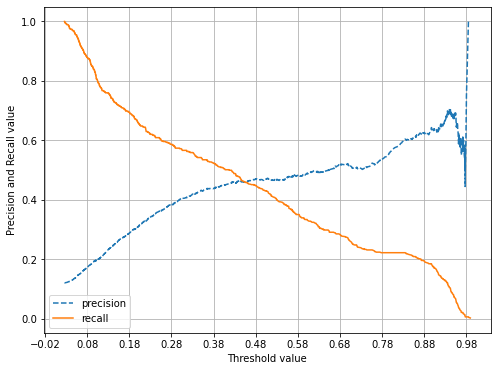

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [40]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.364, 0.4807)

In [41]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.364
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3614  370]
 [ 250  287]]
정확도: 0.8629, 정밀도: 0.4368, 재현율: 0.5345, F1_score:  0.534451


In [42]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.364).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_ENN_0.364_grid.csv', index = False)

## RandomizedGridsearchCV

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [1,2,3,4,5,6,7,8,9,10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}


In [44]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

min_samples_split = [1,2,3,4,5,6,7,8,9,10]

min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [95]:
lg_cl = LGBMClassifier()

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.7min finished


LGBMClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
               min_samples_leaf=5, min_samples_split=7)


In [45]:
lgb_random_best = LGBMClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
               min_samples_leaf=5, min_samples_split=7)

In [46]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
               min_samples_leaf=5, min_samples_split=7)

In [47]:
## 1 ##

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.82812877 0.17187123]
 [0.96999085 0.03000915]
 [0.92129077 0.07870923]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.82812877 0.17187123 0.82812877 0.17187123]
 [0.96999085 0.03000915 0.96999085 0.03000915]
 [0.92129077 0.07870923 0.92129077 0.07870923]]


In [48]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3713  271]
 [ 299  238]]
정확도: 0.8739, 정밀도: 0.4676, 재현율: 0.4432, F1_score:  0.443203


In [49]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1] ###

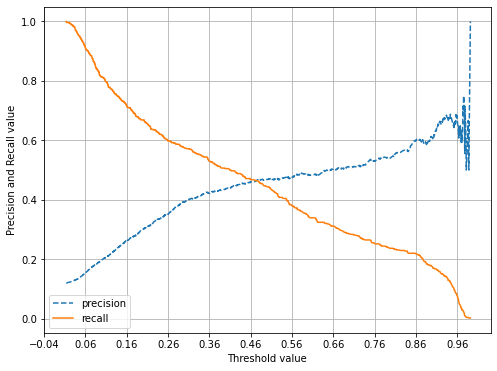

In [50]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [102]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.2, 0.5077)

In [51]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.2
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3150  834]
 [ 178  359]]
정확도: 0.7762, 정밀도: 0.3009, 재현율: 0.6685, F1_score:  0.668529


In [52]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgb_random_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.2).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_ENN_0.2_randomgrid.csv', index = False)

## BaysianOptimization

In [53]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [54]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [55]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [56]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.774576	valid_0's binary_logloss: 0.326389
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.774576	valid_0's binary_logloss: 0.326389
best_iter: 100
roc_auc: 0.7745757237516172
|  1        |  0.7746   |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200,

In [57]:
BO_lgb.max

{'target': 0.7841568789122972,
 'params': {'colsample_bytree': 0.7280751661082743,
  'max_depth': 8.547471590949188,
  'min_child_weight': 5.845541019635982,
  'min_split_gain': 0.062145914210511834,
  'num_leaves': 36.85401017717085,
  'reg_alpha': 0.30846699843737846,
  'reg_lambda': 0.4718740392573121,
  'subsample': 0.8409101495517417}}

In [58]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.749461	valid_0's binary_logloss: 0.374693
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.771266	valid_0's binary_logloss: 0.371596
[3]	valid_0's auc: 0.772386	valid_0's binary_logloss: 0.368868
[4]	valid_0's auc: 0.775247	valid_0's binary_logloss: 0.366555
[5]	valid_0's auc: 0.775376	valid_0's binary_logloss: 0.364458
[6]	valid_0's auc: 0.773949	valid_0's binary_logloss: 0.36241
[7]	valid_0's auc: 0.770849	valid_0's binary_logloss: 0.3607
[8]	valid_0's auc: 0.774992	valid_0's binary_logloss: 0.358345
[9]	valid_0's auc: 0.776938	valid_0's binary_logloss: 0.356127
[10]	valid_0's auc: 0.776761	valid_0's binary_logloss: 0.354569
[11]	valid_0's auc: 0.778028	valid_0's binary_logloss: 0.352674
[12]	valid_0's auc: 0.777411	valid_0's binary_logloss: 0.351482
[13]	valid_0's auc: 0.778219	valid_0's binary_logloss: 0.349822
[14]	valid_0's auc: 0.777941	valid_0's binary_logloss: 0.348303
[15]	valid_0's auc: 0.777006	valid_0's binary_logloss:

In [59]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.7280751661082743, learning_rate=0.02,
               max_depth=9, min_child_weight=5.845541019635982,
               min_split_gain=0.062145914210511834, n_estimators=1000,
               num_leaves=37, reg_alpha=0.30846699843737846,
               reg_lambda=0.4718740392573121, subsample=0.8409101495517417)

In [60]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7280751661082743, learning_rate=0.02,
               max_depth=9, min_child_weight=5.845541019635982,
               min_split_gain=0.062145914210511834, n_estimators=1000,
               num_leaves=37, reg_alpha=0.30846699843737846,
               reg_lambda=0.4718740392573121, subsample=0.8409101495517417)

In [61]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.82201572 0.17798428]
 [0.9711502  0.0288498 ]
 [0.94390235 0.05609765]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.82201572 0.17798428 0.88253262 0.11746738]
 [0.9711502  0.0288498  0.93163307 0.06836693]
 [0.94390235 0.05609765 0.90854898 0.09145102]]


In [62]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3713  271]
 [ 306  231]]
정확도: 0.8724, 정밀도: 0.4602, 재현율: 0.4302, F1_score:  0.430168


In [63]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###

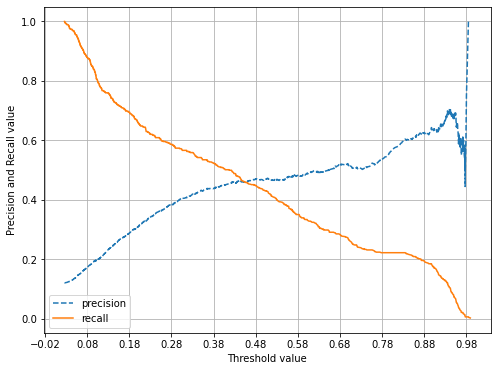

In [64]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [65]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.425, 0.4629)

In [66]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.425
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3641  343]
 [ 272  265]]
정확도: 0.8640, 정밀도: 0.4359, 재현율: 0.4935, F1_score:  0.493482


In [67]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_bayes_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.425).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_ENN_0.425_bayesgrid.csv', index = False)

### Neighbourhood Cleaning Rule
- Neighbourhood Cleaning Rule 방법은 CNN(Condensed Nearest Neighbour) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [71]:
X_train, y_train = NeighbourhoodCleaningRule(n_jobs=-1).fit_sample(X_train, y_train)

In [72]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(13713, 31), 테스트 세트 Shape:(4521, 31)
 학습 세트 레이블 값 분포 비율
False    0.843214
True     0.156786
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881221
True     0.118779
Name: y, dtype: float64


In [73]:
# Light GBM

lgbm_clf = LGBMClassifier(n_estimators=400, n_jobs = -1)
lgbm_clf.fit(X_train, y_train)
lgbm_clf_pred = lgbm_clf.predict(X_test)

lgbm_clf_cv_pre = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
lgbm_clf_cv_rec = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
lgbm_clf_cv_f1 = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Light GBM is ', metrics.precision_score(lgbm_clf_pred, y_test))
print('Recall for Light GBM is ', metrics.recall_score(lgbm_clf_pred, y_test))
print('F1_score for Light GBM is ', metrics.f1_score(lgbm_clf_pred, y_test))
print()
print('The cross validated precision for Light GBM is:', lgbm_clf_cv_pre.mean())
print('The cross validated recall for Light GBM is:', lgbm_clf_cv_rec.mean())
print('The cross validated f1_score for Light GBM is:', lgbm_clf_cv_f1.mean())

Precision for Light GBM is  0.3854748603351955
Recall for Light GBM is  0.47477064220183485
F1_score for Light GBM is  0.4254881808838643

The cross validated precision for Light GBM is: 0.6733088746799302
The cross validated recall for Light GBM is: 0.3730232558139535
The cross validated f1_score for Light GBM is: 0.47938606431695163


In [74]:
##

pred_proba = lgbm_clf.predict_proba(X_test)
pred  = lgbm_clf.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.20632407 0.79367593]
 [0.89885557 0.10114443]
 [0.86743062 0.13256938]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.20632407 0.79367593 0.20632407 0.79367593]
 [0.89885557 0.10114443 0.89885557 0.10114443]
 [0.86743062 0.13256938 0.86743062 0.13256938]]


In [75]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3755  229]
 [ 330  207]]
정확도: 0.8764, 정밀도: 0.4748, 재현율: 0.3855, F1_score:  0.385475


In [76]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf.predict_proba(X_test)[:, 1] 

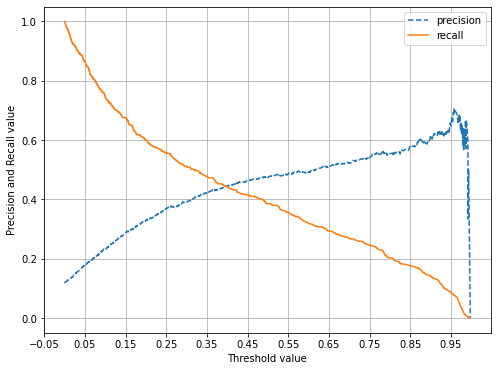

In [77]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf.predict_proba(X_test)[:, 1] )


In [78]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf, X_test, y_test)

(0.365, 0.451)

In [80]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.365
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3652  332]
 [ 284  253]]
정확도: 0.8637, 정밀도: 0.4325, 재현율: 0.4711, F1_score:  0.471136


In [81]:

pred_proba_1 = lgbm_clf.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.365).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_NCR_0.365_nongrid.csv', index = False)

## GridsearchCV

In [82]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소

params = {'num_leaves': [8 ,16 ,32, 64],
          'max_depth':[16, 32, 64, 128, 160],
          'min_child_samples':[20, 60, 100],
          'subsample':[0.2, 0.4, 0.6, 0.8, 1],
         'n_estimators':[100,300,500,700,900,1200]}



gridcv = GridSearchCV(lgbm_clf, param_grid=params, verbose=3, n_jobs=-1, cv=3)

In [83]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 10.8min finished


[1]	training's binary_logloss: 0.416483	valid_1's binary_logloss: 0.357725
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.405057	valid_1's binary_logloss: 0.34995
[3]	training's binary_logloss: 0.394656	valid_1's binary_logloss: 0.343214
[4]	training's binary_logloss: 0.387775	valid_1's binary_logloss: 0.338708
[5]	training's binary_logloss: 0.381142	valid_1's binary_logloss: 0.334723
[6]	training's binary_logloss: 0.37553	valid_1's binary_logloss: 0.33127
[7]	training's binary_logloss: 0.371338	valid_1's binary_logloss: 0.329021
[8]	training's binary_logloss: 0.367785	valid_1's binary_logloss: 0.327194
[9]	training's binary_logloss: 0.363992	valid_1's binary_logloss: 0.325638
[10]	training's binary_logloss: 0.361266	valid_1's binary_logloss: 0.32424
[11]	training's binary_logloss: 0.358311	valid_1's binary_logloss: 0.323224
[12]	training's binary_logloss: 0.355364	valid_1's binary_logloss: 0.322164
[13]	training's binary_logloss: 0.353386

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [16, 32, 64, 128, 160],
                         'min_child_samples': [20, 60, 100],
                         'n_estimators': [100, 300, 500, 700, 900, 1200],
                         'num_leaves': [8, 16, 32, 64],
                         'subsample': [0.2, 0.4, 0.6, 0.8, 1]},
             verbose=3)

In [84]:
gridcv.best_estimator_

LGBMClassifier(max_depth=16, num_leaves=8, subsample=0.2)

In [85]:
lgbm_clf_best = LGBMClassifier(max_depth=16, num_leaves=8, subsample=0.2)

In [86]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=16, num_leaves=8, subsample=0.2)

In [87]:
##

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.47767876 0.52232124]
 [0.7221221  0.2778779 ]
 [0.89328544 0.10671456]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.47767876 0.52232124 0.47767876 0.52232124]
 [0.7221221  0.2778779  0.7221221  0.2778779 ]
 [0.89328544 0.10671456 0.89328544 0.10671456]]


In [88]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3816  168]
 [ 368  169]]
정확도: 0.8814, 정밀도: 0.5015, 재현율: 0.3147, F1_score:  0.314711


In [89]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1] 

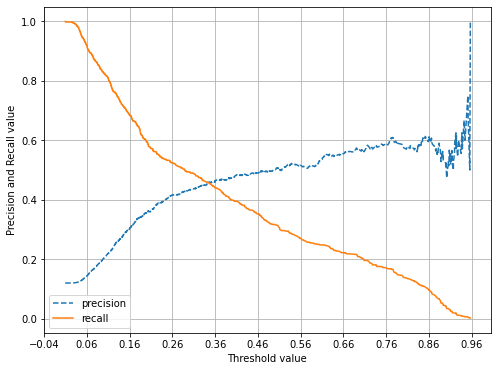

In [90]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [91]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.253, 0.465)

In [92]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.253
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3577  407]
 [ 251  286]]
정확도: 0.8545, 정밀도: 0.4127, 재현율: 0.5326, F1_score:  0.532588


In [93]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.253).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_NCR_0.253_grid.csv', index = False)

## RandomizedGridsearchCV

In [94]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [1,2,3,4,5,6,7,8,9,10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}


In [95]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

min_samples_split = [1,2,3,4,5,6,7,8,9,10]

min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [96]:
lg_cl = LGBMClassifier()

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.4min finished


LGBMClassifier(bootstrap=False, max_depth=90, max_features='auto',
               min_samples_leaf=5, min_samples_split=2, n_estimators=311)


In [97]:
lgb_random_best = LGBMClassifier(bootstrap=False, max_depth=90, max_features='auto',
               min_samples_leaf=5, min_samples_split=2, n_estimators=311)

In [98]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=False, max_depth=90, max_features='auto',
               min_samples_leaf=5, min_samples_split=2, n_estimators=311)

In [99]:
## 1 ##

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.23228766 0.76771234]
 [0.87839179 0.12160821]
 [0.86000343 0.13999657]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.23228766 0.76771234 0.23228766 0.76771234]
 [0.87839179 0.12160821 0.87839179 0.12160821]
 [0.86000343 0.13999657 0.86000343 0.13999657]]


In [100]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3760  224]
 [ 335  202]]
정확도: 0.8764, 정밀도: 0.4742, 재현율: 0.3762, F1_score:  0.376164


In [101]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1] ###

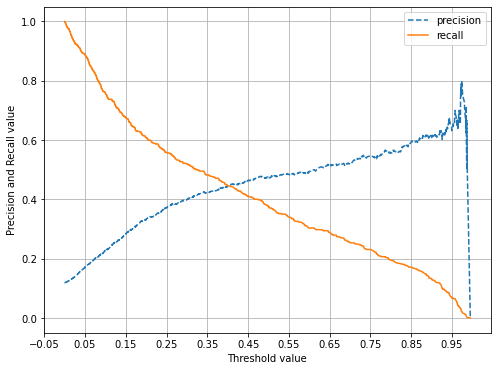

In [102]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [103]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.34, 0.457)

In [104]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.34
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3623  361]
 [ 271  266]]
정확도: 0.8602, 정밀도: 0.4242, 재현율: 0.4953, F1_score:  0.495345


In [105]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgb_random_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.34).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_NCR_0.34_randomgrid.csv', index = False)

## BaysianOptimization

In [106]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [107]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [108]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [109]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.765471	valid_0's binary_logloss: 0.315956
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.765471	valid_0's binary_logloss: 0.315956
best_iter: 100
roc_auc: 0.76547110228624
|  1        |  0.7655   |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, '

In [110]:
BO_lgb.max

{'target': 0.7827102170320014,
 'params': {'colsample_bytree': 0.5,
  'max_depth': 12.0,
  'min_child_weight': 5.0,
  'min_split_gain': 0.1,
  'num_leaves': 33.621116050160964,
  'reg_alpha': 0.0,
  'reg_lambda': 0.0,
  'subsample': 1.0}}

In [111]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.687975	valid_0's binary_logloss: 0.367767
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.683573	valid_0's binary_logloss: 0.366383
[3]	valid_0's auc: 0.695447	valid_0's binary_logloss: 0.364302
[4]	valid_0's auc: 0.706713	valid_0's binary_logloss: 0.362216
[5]	valid_0's auc: 0.720218	valid_0's binary_logloss: 0.360197
[6]	valid_0's auc: 0.723094	valid_0's binary_logloss: 0.358766
[7]	valid_0's auc: 0.723401	valid_0's binary_logloss: 0.35708
[8]	valid_0's auc: 0.74139	valid_0's binary_logloss: 0.354748
[9]	valid_0's auc: 0.752981	valid_0's binary_logloss: 0.352358
[10]	valid_0's auc: 0.755369	valid_0's binary_logloss: 0.350894
[11]	valid_0's auc: 0.760063	valid_0's binary_logloss: 0.349042
[12]	valid_0's auc: 0.757719	valid_0's binary_logloss: 0.348239
[13]	valid_0's auc: 0.759326	valid_0's binary_logloss: 0.346476
[14]	valid_0's auc: 0.762457	valid_0's binary_logloss: 0.34469
[15]	valid_0's auc: 0.762036	valid_0's binary_logloss:

In [112]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.02, max_depth=12,
               min_child_weight=5.0, min_split_gain=0.1, n_estimators=1000,
               num_leaves=34)

In [113]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.02, max_depth=12,
               min_child_weight=5.0, min_split_gain=0.1, n_estimators=1000,
               num_leaves=34)

In [114]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.23910661 0.76089339]
 [0.80740206 0.19259794]
 [0.83120106 0.16879894]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.23910661 0.76089339 0.47767876 0.52232124]
 [0.80740206 0.19259794 0.7221221  0.2778779 ]
 [0.83120106 0.16879894 0.89328544 0.10671456]]


In [115]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3768  216]
 [ 340  197]]
정확도: 0.8770, 정밀도: 0.4770, 재현율: 0.3669, F1_score:  0.366853


In [116]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###

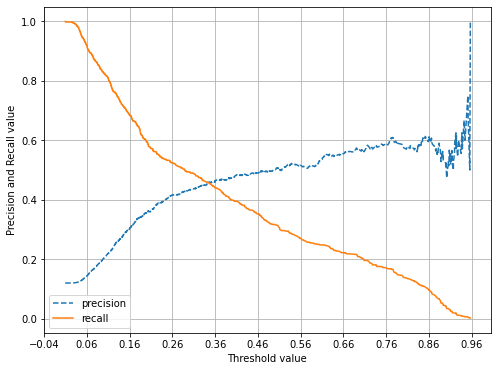

In [117]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [118]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.275, 0.4687)

In [119]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.275
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3567  417]
 [ 245  292]]
정확도: 0.8536, 정밀도: 0.4118, 재현율: 0.5438, F1_score:  0.543762


In [120]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_bayes_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=0.275).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./under_NCR_0.275_bayesgrid.csv', index = False)

# 오버샘플링+복합샘플링 기법 적용하여 이어서 진행